In [4]:
import numpy as np
import matplotlib.pyplot as pl

In [5]:
import numpy.distutils.system_info as sysinfo

sysinfo.platform_bits

64

In [6]:
def round_sig(f, p):
    return float(('%.' + str(p) + 'e') % f)

In [7]:
def expon(x,i):
    y=0
    if i==0:
        y=1
    elif i==1:
        y=x
    else:
        y=round_sig(expon(x,i-1)*x,4)
    return y

In [31]:
def fact(i,den):
    y=0
    if i==0:
        y=1.0000
    else:
        y=round_sig(den[i-1]*(i*1.0000),4)
    return y

In [32]:
last=31
x=5.5
num=np.zeros(last)
den=np.arange(0,float(last),1)
terms=np.zeros(last)
n=0
while n<last:
    num[n]=expon(x,n)
    den[n]=fact(n,den)
    terms[n]=round_sig(num[n]/den[n],4)
    print('term',n+1,'=',terms[n], '\\\ ')
    n=n+1

term 1 = 1.0 \\ 
term 2 = 5.5 \\ 
term 3 = 15.125 \\ 
term 4 = 27.73 \\ 
term 5 = 38.129 \\ 
term 6 = 41.942 \\ 
term 7 = 38.447 \\ 
term 8 = 30.208 \\ 
term 9 = 20.768 \\ 
term 10 = 12.692 \\ 
term 11 = 6.9805 \\ 
term 12 = 3.4902 \\ 
term 13 = 1.5997 \\ 
term 14 = 0.67679 \\ 
term 15 = 0.26588 \\ 
term 16 = 0.097484 \\ 
term 17 = 0.03351 \\ 
term 18 = 0.010842 \\ 
term 19 = 0.0033128 \\ 
term 20 = 0.00095898 \\ 
term 21 = 0.00026372 \\ 
term 22 = 6.907e-05 \\ 
term 23 = 1.7269e-05 \\ 
term 24 = 4.1297e-06 \\ 
term 25 = 9.4638e-07 \\ 
term 26 = 2.0821e-07 \\ 
term 27 = 4.4043e-08 \\ 
term 28 = 8.9715e-09 \\ 
term 29 = 1.7623e-09 \\ 
term 30 = 3.3422e-10 \\ 
term 31 = 6.1274e-11 \\ 


[1.0000e+00 5.5000e+00 1.5125e+01 2.7730e+01 3.8129e+01 4.1942e+01
 3.8447e+01 3.0208e+01 2.0768e+01 1.2692e+01 6.9805e+00 3.4902e+00
 1.5997e+00 6.7679e-01 2.6588e-01 9.7484e-02 3.3510e-02 1.0842e-02
 3.3128e-03 9.5898e-04 2.6372e-04 6.9070e-05 1.7269e-05 4.1297e-06
 9.4638e-07 2.0821e-07 4.4043e-08 8.9715e-09 1.7623e-09 3.3422e-10
 6.1274e-11]


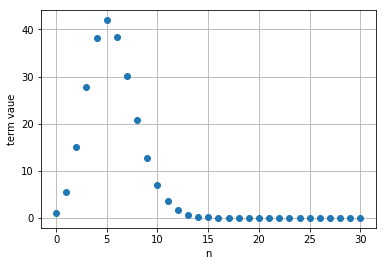

In [28]:
print(terms)
t=np.arange(0,last,1)
fig,ax = pl.subplots()

ax.plot(t, terms,'o')

ax.set_xlabel('n')
ax.set_ylabel('term vaue')

pl.rc('grid', linestyle=":", color='grey')
pl.grid(True)

In [ ]:
def summation_left(terms,k,val,S):    
    y=0
    if k==0:
        y=val
    else:
        y=round_sig(S[k-1]+val,4)
    return y

In [ ]:
S=np.arange(0.,31.,1)
for i,val in enumerate(terms):
    S[i]=summation_left(terms,i,val,S)
    print('S_{',i,'} =',S[i], '\\\ ')

In [ ]:
def summation_right(terms,k):
    y=0
    if k==0:
        y=terms[k]
    else:
        y=round_sig(terms[0]+summation_right(terms[1:k+1],k-1),4)
#     print(k,y)
    return y

In [ ]:
right=np.arange(0.,31.,1)
for i,val in enumerate(terms):
    right[i]=summation_right(terms,i)
    print('S_{',i,'} =',right[i], '\\\ ')

In [ ]:
correct=np.exp(5.5)
print(correct)
rel_err=abs((correct-S)/correct)
print(rel_err[-1])
rel_err_r=abs((right-correct)/correct)
print(rel_err_r[-1])

In [ ]:
odd=np.zeros(last)
part_d=np.zeros(5)
rel_err=np.zeros(5)

for idx,i in enumerate(terms):
    if idx % 2 == 0:
        odd[idx]=i
    else:
        odd[idx]=-i
print(odd)
fig,ax = pl.subplots()

ax.plot(t, odd,'o')

ax.set_xlabel('n')
ax.set_ylabel('term vaue')

pl.rc('grid', linestyle=":", color='grey')
pl.grid(True)

In [ ]:
S_1=np.arange(0.,31.,1)
for i,val in enumerate(odd):
    S_1[i]=summation_left(terms,i,val,S_1)
    print('S_{',i,'} =',S_1[i], ' \\\ ')

part_d[0]=S_1[-1]

In [ ]:
part_2=np.arange(0.,31.,1)
for i,val in enumerate(odd):
    part_2[i]=summation_right(odd,i)
    print('S_{',i,'} =',part_2[i],'\\\ ')

part_d[1]=part_2[-1]

In [ ]:
pos=np.zeros(int(last/2)+1)
neg=np.zeros(int(last/2))

for idx,i in enumerate(odd):
    if idx % 2 == 0:
        pos[int(idx/2)]=i
    else:
        neg[int((idx-1)/2)]=i
print(pos,'\n',neg)

In [ ]:
positive=np.arange(0.,31.,1)
negative=np.arange(0.,31.,1)
part_3=np.arange(0.,31.,1)

for i,val in enumerate(pos):
    positive[i]=summation_left(pos,i,val,positive)
#     print('positive_{',i,'} =',positive[i], ' \\\ ')
    
for i,val in enumerate(neg):
    negative[i]=summation_left(neg,i,val,negative)
#     print('negative_{',i,'} =',negative[i], ' \\\ ')
    
for i,val in enumerate(odd):
    if i==0:
        part_3[i]=val
    elif i==1:
        part_3[i]=round_sig(positive[0]+negative[0],4)
    elif i % 2 == 0: #even
        part_3[i]=round_sig(positive[int(i/2)]+negative[int((i/2)-1)],4)
    else:
        part_3[i]=round_sig(positive[int(i-((i+1)/2))]+negative[int(i-((i+1)/2))],4)
    print('S_{',i,'} =',part_3[i], ' \\\ ')

part_d[2]=part_3[-1]

In [ ]:
positive=np.arange(0.,31.,1)
negative=np.arange(0.,31.,1)
part_4=np.arange(0.,31.,1)
for i,val in enumerate(odd):
    if i == 0:
        part_4[i]=val
    elif i==1:
        part_4[i]=summation_left(odd,i,val,part_3)
    else:
        positive[i]=summation_right(pos,int(i/2))
        negative[i]=summation_right(neg,int(i-((i+1)/2)))
        part_4[i]=round_sig(positive[i]+negative[i],4)
    print('S_{',i,'} =',part_4[i], ' \\\ ')

part_d[3]=part_4[-1]

In [ ]:
part_e=np.arange(0.,31.,1)
for i,val in enumerate(terms):
    part_e[i]=round_sig(1/S[i],4)
    print('S_{',i,'} =',part_e[i], ' \\\ ')

part_d[4]=part_e[-1]

print(part_d)

correct_neg=np.exp(-5.5)
print('correct_neg',correct_neg)
for idx,i in enumerate(part_d):
    rel_err[idx]=abs((i-correct_neg)/correct_neg)
print(rel_err)